In [2]:
import pandas as pd 
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
os.chdir("/home/robbe/ionbot/Ageing_study/")
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD012477/raw_files/QuantifiedPeptides.tsv", sep= "\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD012477/flashlfq_results/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant = quant[~quant["Protein Groups"].str.contains("sp|", na=False, regex=False)]
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_1DLC012615QE_RRAG_014B_rep4,Intensity_1DLC121914QE_RRAG_029_rep4,Intensity_1DLC122214QE_RRAG_040_rep4,Intensity_1DLC071515QE_RRAG_058B_rep2,Intensity_1DLC121514QE_RRAG_019_rep2,...,Intensity_1DLC122214QE_RRAG_036_rep1,Intensity_1DLC060615QE_RRAG_037B_rep3,Intensity_1DLC121514QE_RRAG_022_rep3,Intensity_1DLC122914QE_RRAG_055_rep3,Intensity_1DLC012615QE_RRAG_006B_rep3,Intensity_1DLC061715QE_RRAG_038B_rep4,Intensity_1DLC121414QE_RRAG_012_rep2,Intensity_1DLC051815QE_RRAG_018B_rep2,Intensity_1DLC012615QE_RRAG_007B_rep1,Unnamed: 983
0,AAAAAAAAAAAAAAAASAGGKx|[1927]Delta:H(4)C(5)O(1...,AAAAAAAAAAAAAAAASAGGK,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,7.056849e+05,0.000000,0.0,1.097085e+06,0.0,108828.848060,NaN
1,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN
2,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN
3,AAAAAAAAGAFAGRR7|[1918]Carbonyl[A],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN
4,AAAAAAAAQMHAKx|[205]Delta:H(6)C(6)O(1)[K],AAAAAAAAQMHAK,NaN,NaN,NaN,308918.957796,211139.976308,459861.238281,0.0,1.235488e+06,...,1.319586e+06,0.0,0.0,1.874100e+06,191749.419922,0.0,0.000000e+00,0.0,349322.769137,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102383,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[100...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN
102384,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[131...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN
102385,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[6]C...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN
102386,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[999...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,NaN


In [3]:
cols =[col for col in quant.columns if "Intensity" in col]


In [4]:
OA.quantile_transform(quant, cols)
quant[cols] = quant[cols].apply(lambda x: x/x.sum())

In [5]:
summedintensities = OA.summedintensities(quant)
summedintensities

,Modifications,Gene Names,Organism,Intensity_1DLC012615QE_RRAG_014B_rep4,Intensity_1DLC121914QE_RRAG_029_rep4,Intensity_1DLC122214QE_RRAG_040_rep4,Intensity_1DLC071515QE_RRAG_058B_rep2,Intensity_1DLC121514QE_RRAG_019_rep2,Intensity_1DLC123114QE_RRAG_064_rep4,Intensity_1DLC121514QE_RRAG_017_rep2,...,Intensity_1DLC060615QE_RRAG_037B_rep3,Intensity_1DLC121514QE_RRAG_022_rep3,Intensity_1DLC122914QE_RRAG_055_rep3,Intensity_1DLC012615QE_RRAG_006B_rep3,Intensity_1DLC061715QE_RRAG_038B_rep4,Intensity_1DLC121414QE_RRAG_012_rep2,Intensity_1DLC051815QE_RRAG_018B_rep2,Intensity_1DLC012615QE_RRAG_007B_rep1,Unnamed: 983,Oxmod?
0,[1384]Homocysteic_acid[M],0.0,0.0,0.000482,0.000417,0.000416,0.000139,0.000367,0.000850,0.000587,...,0.000268,0.000462,0.000622,0.000412,0.000173,0.000365,0.000000,0.000350,0.0,74
1,[1914]Met->AspSA[M],0.0,0.0,0.003180,0.002950,0.003119,0.001864,0.003312,0.003494,0.003297,...,0.001161,0.002660,0.002973,0.002990,0.001282,0.003035,0.001305,0.003211,0.0,158
2,[1915]Decarboxylation[D],0.0,0.0,0.001107,0.001110,0.001128,0.000663,0.000875,0.000952,0.001104,...,0.000558,0.000973,0.001171,0.001103,0.000555,0.001106,0.000674,0.000825,0.0,95
3,[1915]Decarboxylation[E],0.0,0.0,0.001188,0.001171,0.001748,0.001135,0.001465,0.001471,0.001357,...,0.000956,0.001208,0.001697,0.001568,0.001212,0.002290,0.000860,0.001543,0.0,139
4,[1916]Aspartylurea[H],0.0,0.0,0.000420,0.000163,0.000330,0.000237,0.000393,0.000303,0.000496,...,0.000131,0.000178,0.000488,0.000322,0.000373,0.000959,0.000192,0.000554,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,[743]4-ONE+Delta:H(-2)O(-1)[K],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000063,0.000000,0.0,2
92,[860]G-H1[R],0.0,0.0,0.000064,0.000122,0.000101,0.000038,0.000092,0.000059,0.000050,...,0.000073,0.000061,0.000188,0.000092,0.000102,0.000056,0.000000,0.000190,0.0,15
93,[936]Chlorination[Y],0.0,0.0,0.000232,0.000250,0.000171,0.000254,0.000215,0.000290,0.000332,...,0.000146,0.000384,0.000207,0.000247,0.000265,0.000267,0.000269,0.000260,0.0,138
94,[937]dichlorination[Y],0.0,0.0,0.000099,0.000051,0.000050,0.000115,0.000042,0.000040,0.000141,...,0.000073,0.000128,0.000000,0.000048,0.000000,0.000070,0.000065,0.000000,0.0,20


In [6]:
dict = {}
patientIDlist = []
patientIDBlist = []
for i in range(1,66):
    patientID = "_"+str(i).zfill(3)+"_"
    patientIDB = "_"+str(i).zfill(3)+"B_"
    patientIDlist.append(patientID)
    patientIDBlist.append(patientIDB)
for patient in patientIDlist:
    selected = summedintensities[[col for col in summedintensities if patient in col]]
    selected["Modifications"] = summedintensities["Modifications"]
    dict[patient] = selected
for patientB in patientIDBlist:
    selectedB = summedintensities[[col for col in summedintensities if patientB in col]]
    selected["Modifications"] = summedintensities["Modifications"]
    dict[patientB] = selectedB

In [7]:
for i in dict:
    df = dict[i]
    df["median"] = df.median(axis=1)

In [8]:
moddf = pd.DataFrame()
moddf["Modifications"] = summedintensities["Modifications"]
for patient in dict:
    moddf[patient] = dict[patient]["median"]

In [9]:
moddf = moddf.dropna(axis=1)
moddf

,Modifications,_001_,_002_,_003_,_004_,_005_,_006_,_007_,_008_,_009_,...,_053B_,_054B_,_055B_,_056B_,_058B_,_059B_,_060B_,_061B_,_062B_,_064B_
0,[1384]Homocysteic_acid[M],0.000176,0.000250,0.000240,0.000125,0.000445,0.000445,0.000447,0.000361,0.000194,...,0.000193,0.000220,0.000156,0.000098,0.000119,0.000280,0.000228,0.000161,0.000087,0.000224
1,[1914]Met->AspSA[M],0.002213,0.002376,0.001797,0.002263,0.003041,0.002747,0.002870,0.003203,0.002625,...,0.002016,0.001496,0.001639,0.001500,0.001657,0.002099,0.001530,0.001765,0.001717,0.001948
2,[1915]Decarboxylation[D],0.000759,0.000675,0.000735,0.000701,0.000878,0.000823,0.000834,0.000890,0.001140,...,0.000778,0.000611,0.000585,0.000627,0.000705,0.000623,0.000647,0.000495,0.000704,0.000594
3,[1915]Decarboxylation[E],0.001186,0.001640,0.001265,0.001306,0.001538,0.001384,0.001697,0.001855,0.001537,...,0.001462,0.001148,0.000998,0.000896,0.001035,0.001258,0.000894,0.000864,0.000836,0.000807
4,[1916]Aspartylurea[H],0.000278,0.000436,0.000308,0.000333,0.000474,0.000380,0.000319,0.000569,0.000465,...,0.000311,0.000376,0.000275,0.000314,0.000260,0.000317,0.000156,0.000133,0.000187,0.000186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,[743]4-ONE+Delta:H(-2)O(-1)[K],0.000000,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
92,[860]G-H1[R],0.000017,0.000072,0.000094,0.000049,0.000131,0.000120,0.000128,0.000122,0.000100,...,0.000039,0.000046,0.000049,0.000053,0.000043,0.000092,0.000053,0.000038,0.000045,0.000044
93,[936]Chlorination[Y],0.000288,0.000236,0.000161,0.000149,0.000261,0.000201,0.000176,0.000217,0.000254,...,0.000296,0.000208,0.000233,0.000196,0.000278,0.000268,0.000217,0.000317,0.000158,0.000193
94,[937]dichlorination[Y],0.000073,0.000063,0.000000,0.000047,0.000000,0.000046,0.000056,0.000083,0.000139,...,0.000000,0.000000,0.000024,0.000000,0.000119,0.000000,0.000000,0.000119,0.000000,0.000000


In [10]:
Healthydf = pd.DataFrame()
NonHealthydf = pd.DataFrame()
Healthydf["Modifications"] = summedintensities["Modifications"]
NonHealthydf["Modifications"] = summedintensities["Modifications"]
Healthy = [1,3,4,5,6,11,13,14,19,21,23,24,25,28,29,32,33,34,36,37,40,41,42,47,52,54,56,57,60,61,65]
NonHealthy = [2,7,9,10,12,15,17,18,20,22,26,27,30,31,35,38,39,43,44,45,46,48,49,50,51,53,55,58,59,62,63,64,8,16]
patienlist = []
patienBlist = []
for i in Healthy:
    patien = "_"+str(i).zfill(3)+"_"
    patienlist.append(patien)
    patienB = "_"+str(i).zfill(3)+"B_"
    patienBlist.append(patienB)

for i in patienlist:
    if i in moddf.columns:
        Healthydf[i] = moddf[i]
for i in patienBlist:
    if i in moddf.columns:
        Healthydf[i] = moddf[i]

In [11]:
NonHealthydf = pd.DataFrame()
patielist = []
patieBlist = []
NonHealthydf["Modifications"] = summedintensities["Modifications"]
for i in NonHealthy:
    patie = "_"+str(i).zfill(3)+"_"
    patielist.append(patie)
    patieB = "_"+str(i).zfill(3)+"B_"
    patieBlist.append(patieB)

for i in patielist:
    if i in moddf.columns:
        NonHealthydf[i] = moddf[i]
for i in patieBlist:
    if i in moddf.columns:
        NonHealthydf[i] = moddf[i]

In [12]:
import scipy.stats as stats
import seaborn as sns
from statannotations.Annotator import Annotator

In [13]:
def boxplots(Controldf, Treatmentdf, specific=True):
    import scipy.stats as stats
    from statsmodels.stats.multitest import multipletests
    from pyteomics import mass as pymass
    from itertools import combinations
    import re
    from statannotations.Annotator import Annotator
    db = pymass.Unimod()

    pvallist = []
    for index, row in Controldf.iterrows():
        for index2, row2 in Treatmentdf.iterrows():
            if index == index2:
                if specific:
                    mod = row["Modifications"]
                    modname = re.search(pattern=r"\[\d+\](.*)", string=mod).group(1)
                else:
                    mod = row["UnimodAccession"]
                    modname = mod
                dataControl = Controldf.iloc[index][1:]
                dataControl = dataControl.astype(float)
                dataControl = dataControl.astype(float)
                dataControl = dataControl[dataControl != 0]
                dataTreatment = Treatmentdf.iloc[index][1:]
                dataTreatment = dataTreatment.astype(float)
                dataTreatment = dataTreatment[dataTreatment !=0]
                if dataTreatment.size != 0 and dataControl.size != 0:
                    pval = stats.mannwhitneyu(dataControl, dataTreatment).pvalue
                    pvallist.append(pval)
                    if (pval < 0.05):
                        plt.figure(figsize=(8,8))
                        df = pd.DataFrame({"Healthy": pd.Series(dataControl.values), "Non-Healthy": pd.Series(dataTreatment.values)})
                        
                        ax = sns.boxplot(data=df)
                        pairs = list(combinations(["Healthy", "Non-Healthy"], r=2))
                        annotator = Annotator(ax, pairs = pairs, data=df)
                        annotator.configure(test="Mann-Whitney", verbose=0, text_format="simple")
                        annotator.apply_and_annotate()
                        sns.stripplot(data=df, alpha = 0.7, color="black")
                        plt.title("{}-modified peptide intensities".format(modname))
                        plt.ylabel("summed log2(peptide intensities)")
                        plt.show()
    corrected_pvals = multipletests(pvallist, method= "fdr_bh")[1].tolist()
    counter = 0
    for i in zip(pvallist, corrected_pvals):
        if i[0] < 0.05:
            print("{}: {} => {}".format(counter, i[0], i[1]))
            counter += 1
            


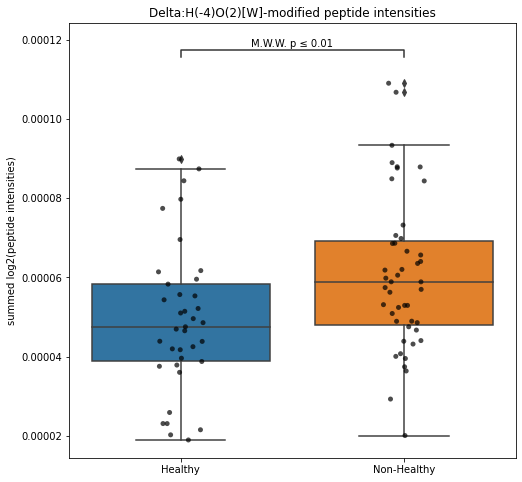

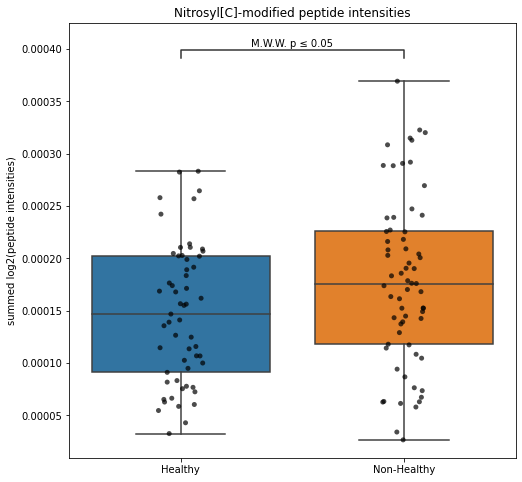

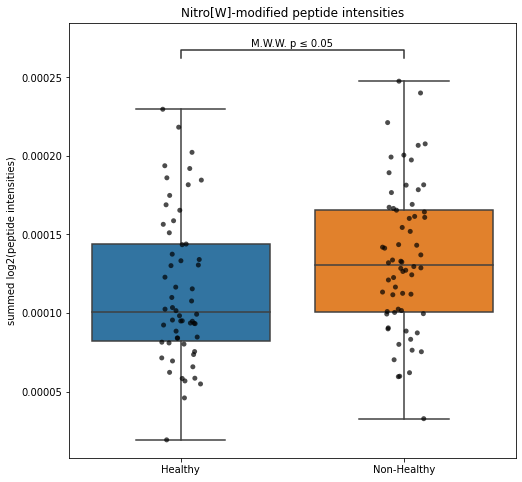

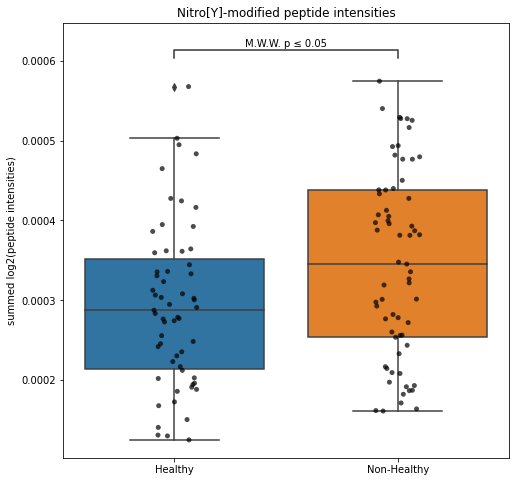

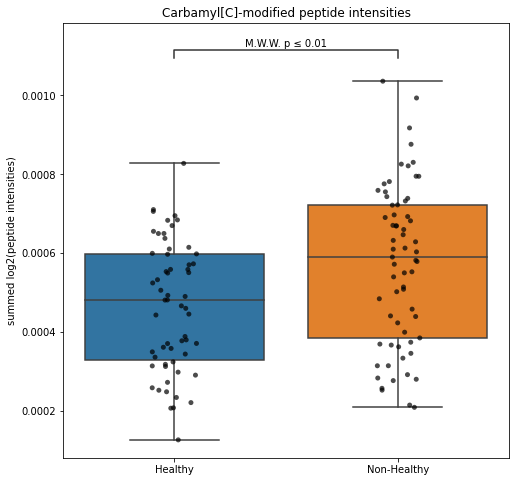

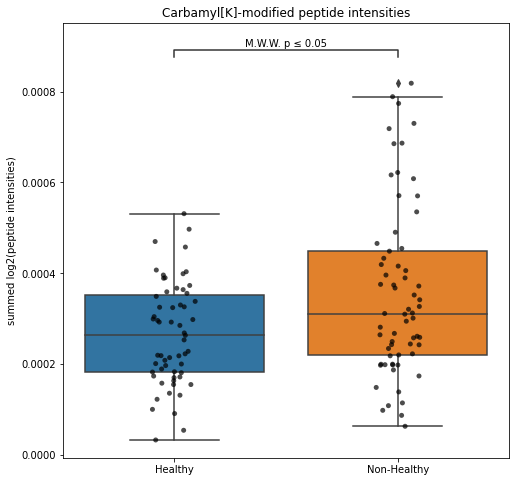

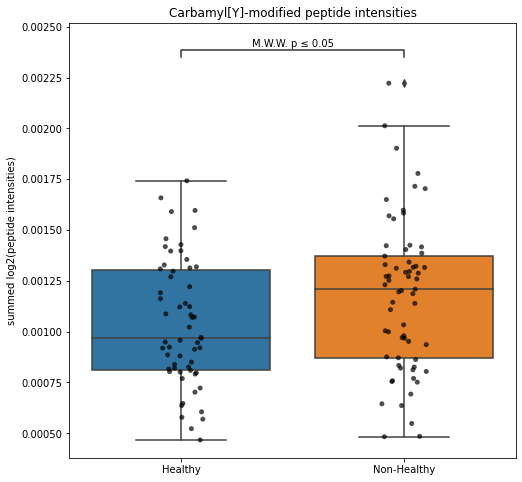

0: 0.006332061909831032 => 0.290522494759094
1: 0.038160720152565185 => 0.4742834281337337
2: 0.01396233241316539 => 0.290522494759094
3: 0.015453324189313508 => 0.290522494759094
4: 0.0024701738880925166 => 0.23219634548069656
5: 0.011515768048461772 => 0.290522494759094
6: 0.04755872500833507 => 0.4742834281337337


In [14]:
boxplots(Healthydf, NonHealthydf)

In [15]:
Healthydf["UnimodAccession"] = Healthydf["Modifications"].apply(OA.get_unimod_acc)
NonHealthydf["UnimodAccession"] = NonHealthydf["Modifications"].apply(OA.get_unimod_acc)

In [17]:
HealthyNS = Healthydf.groupby("UnimodAccession").sum().reset_index()
NonHealthyNS = NonHealthydf.groupby("UnimodAccession").sum().reset_index()

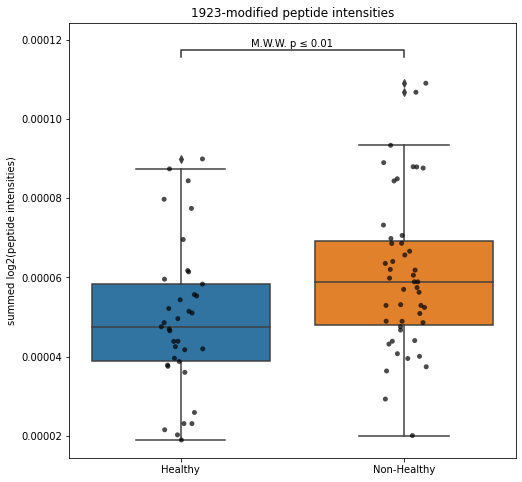

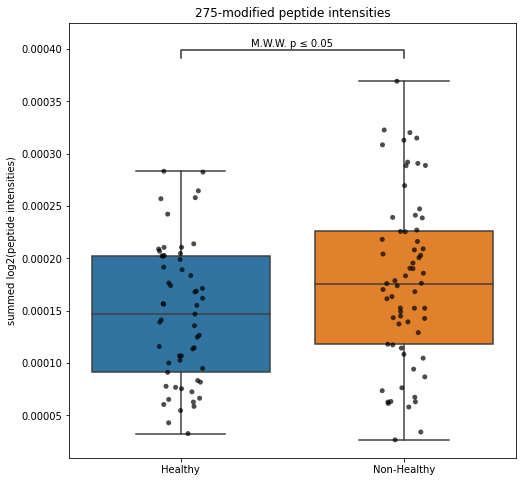

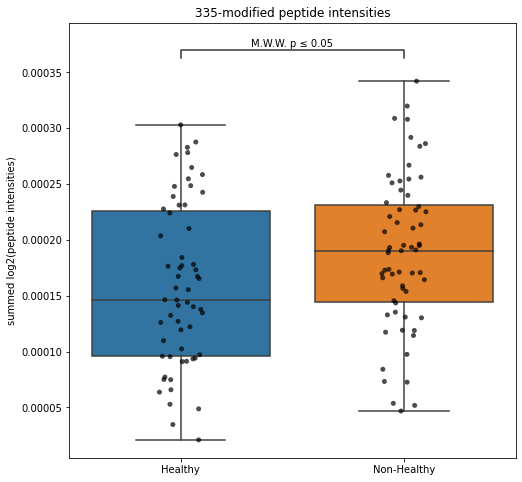

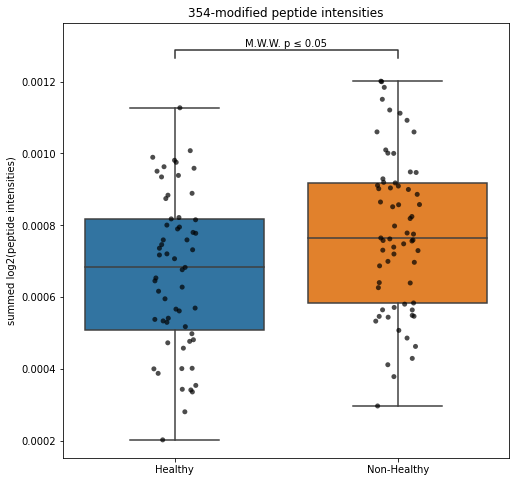

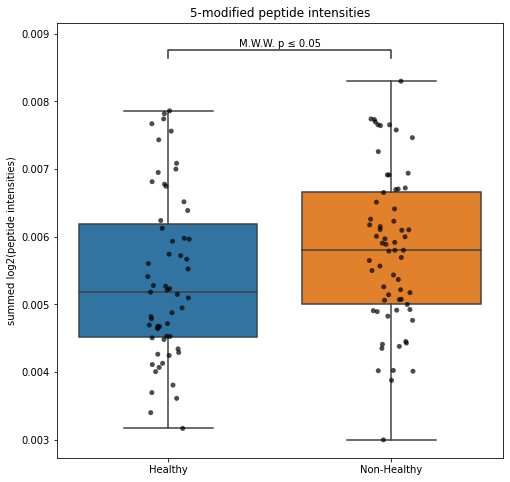

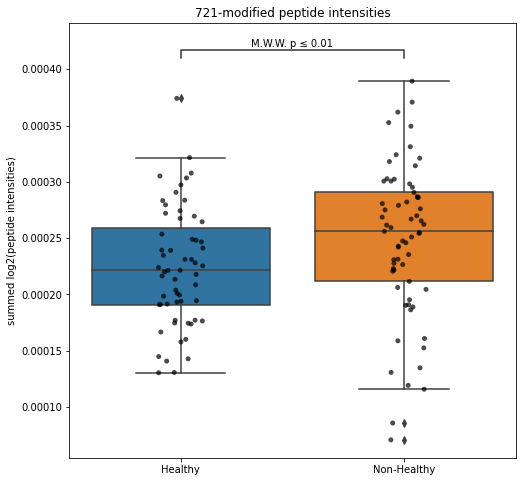

0: 0.006332061909831032 => 0.15278377695265696
1: 0.038160720152565185 => 0.27984528111881135
2: 0.026882149170281536 => 0.27984528111881135
3: 0.01041707570131752 => 0.15278377695265696
4: 0.03431264620282487 => 0.27984528111881135
5: 0.008749051090958275 => 0.15278377695265696


In [19]:
boxplots(Controldf=HealthyNS, Treatmentdf=NonHealthyNS, specific=False)